### Importación de librerias

In [5]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importación de los dataset

In [8]:
ds_caldas = xr.open_dataset("TemperauraSuperficialSueloCaldas.nc")
ds_sierra = xr.open_dataset("TemperaturaSuperficialSueloSierra.nc")

df_TScaldas = ds_caldas.to_dataframe().reset_index()
df_TSsierra = ds_sierra.to_dataframe().reset_index()

In [11]:
df_TScaldas

,time,bnds,GLDAS_NOAH10_M_2_1_AvgSurfT_inst,datamonth,time_bnds
0,2015-01-01,0,290.615631,201501,2015-01-01
1,2015-01-01,1,290.615631,201501,2015-02-01
2,2015-02-01,0,291.294617,201502,2015-02-01
3,2015-02-01,1,291.294617,201502,2015-03-01
4,2015-03-01,0,291.690796,201503,2015-03-01
...,...,...,...,...,...
247,2025-04-01,1,291.522614,202504,2025-05-01
248,2025-05-01,0,291.290070,202505,2025-05-01
249,2025-05-01,1,291.290070,202505,2025-06-01
250,2025-06-01,0,290.713898,202506,2025-06-01


In [12]:
df_TSsierra

,time,bnds,GLDAS_NOAH10_M_2_1_AvgSurfT_inst,datamonth,time_bnds
0,2015-01-01,0,298.237366,201501,2015-01-01
1,2015-01-01,1,298.237366,201501,2015-02-01
2,2015-02-01,0,300.549286,201502,2015-02-01
3,2015-02-01,1,300.549286,201502,2015-03-01
4,2015-03-01,0,301.899353,201503,2015-03-01
...,...,...,...,...,...
247,2025-04-01,1,299.914612,202504,2025-05-01
248,2025-05-01,0,298.325989,202505,2025-05-01
249,2025-05-01,1,298.325989,202505,2025-06-01
250,2025-06-01,0,298.118073,202506,2025-06-01


### Limpieza de datos

In [ ]:
# Cambiamos el nombre de la variable para un mejor manejo ---
varname = "GLDAS_NOAH10_M_2_1_AvgSurfT_inst"
df_TScaldas = df_TScaldas.rename(columns={varname: "TS"})
df_TSsierra = df_TSsierra.rename(columns={varname: "TS"})

In [ ]:
# ================================================
# Conversión de Temperatura Superficial del Suelo (K → °C)
# y cálculo de promedios mensuales para Caldas y Sierra Nevada
# ================================================

import pandas as pd
import matplotlib.pyplot as plt

# Convertimos TS de Kelvin a °C ---
def convert_to_celsius(df, variable):
    df['TS_C'] = df[variable] - 273.15
    return df

df_TScaldas = convert_to_celsius(df_TScaldas, "TS")
df_TSsierra = convert_to_celsius(df_TSsierra, "TS")

In [ ]:
# Creamos la columna "month" para agrupar ---
df_TScaldas['month'] = df_TScaldas['time'].dt.to_period('M')
df_TSsierra['month'] = df_TSsierra['time'].dt.to_period('M')


In [ ]:
# Calculamos el promedio mensual ---
TS_monthly_caldas = df_TScaldas.groupby('month')['TS_C'].mean().reset_index()
TS_monthly_sierra = df_TSsierra.groupby('month')['TS_C'].mean().reset_index()


In [21]:
# Convertimos 'month' a formato de fecha ---
TS_monthly_caldas['month'] = TS_monthly_caldas['month'].dt.to_timestamp()
TS_monthly_sierra['month'] = TS_monthly_sierra['month'].dt.to_timestamp()


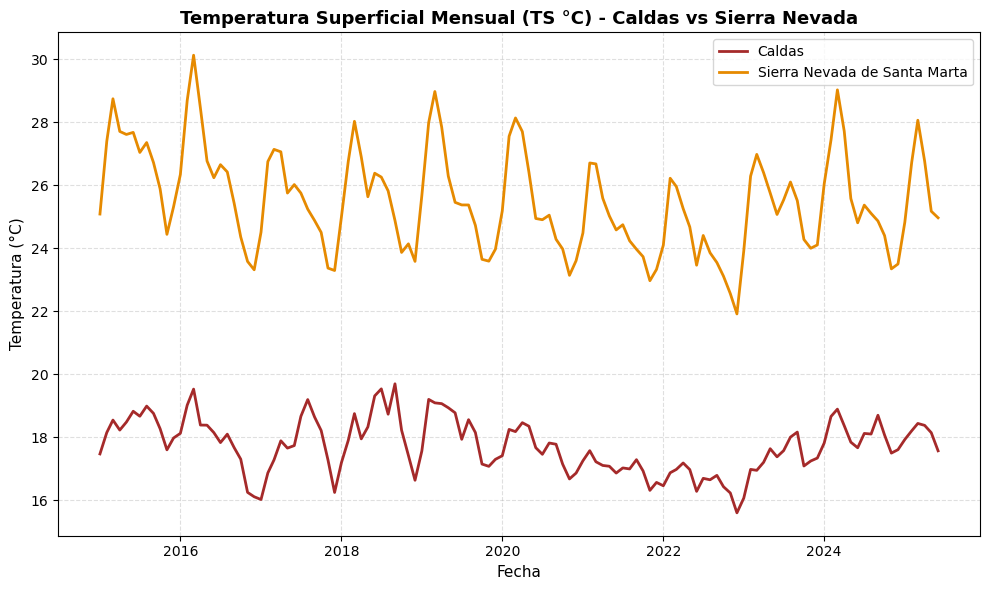

In [24]:
# --- Gráfico comparativo con estilo consistente ---
plt.figure(figsize=(10,6))

# Curvas
plt.plot(TS_monthly_caldas['month'], TS_monthly_caldas['TS_C'],
         label='Caldas', color='#A52A2A', linewidth=2)
plt.plot(TS_monthly_sierra['month'], TS_monthly_sierra['TS_C'],
         label='Sierra Nevada de Santa Marta', color='#E68A00', linewidth=2)

# Título y etiquetas
plt.title('Temperatura Superficial Mensual (TS °C) - Caldas vs Sierra Nevada',
          fontsize=13, fontweight='bold')
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Temperatura (°C)', fontsize=11)

# Cuadrícula y estilo general
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.tight_layout()

# Mostrar
plt.show()



In [27]:
# ===========================================================
# CLASIFICACIÓN DE MESES SEGÚN TEMPERATURA SUPERFICIAL (TS)
# Caldas y Sierra Nevada
# ===========================================================

# Cuartiles (percentiles 25 y 75) para definir umbrales
p25_caldas = TS_monthly_caldas['TS_C'].quantile(0.25)
p75_caldas = TS_monthly_caldas['TS_C'].quantile(0.75)

p25_sierra = TS_monthly_sierra['TS_C'].quantile(0.25)
p75_sierra = TS_monthly_sierra['TS_C'].quantile(0.75)

# Clasificamos los meses según su temperatura
TS_monthly_caldas['clima_mes'] = TS_monthly_caldas['TS_C'].apply(
    lambda x: 'Frío' if x < p25_caldas else ('Cálido' if x > p75_caldas else 'Normal')
)

TS_monthly_sierra['clima_mes'] = TS_monthly_sierra['TS_C'].apply(
    lambda x: 'Frío' if x < p25_sierra else ('Cálido' if x > p75_sierra else 'Normal')
)

# Visualizamos los primeros registros
TS_monthly_caldas[['month', 'TS_C', 'clima_mes']].head(15)


,month,TS_C,clima_mes
0,2015-01-01,17.465637,Normal
1,2015-02-01,18.144623,Normal
2,2015-03-01,18.540802,Cálido
3,2015-04-01,18.223419,Normal
4,2015-05-01,18.476868,Cálido
5,2015-06-01,18.820587,Cálido
6,2015-07-01,18.662811,Cálido
7,2015-08-01,18.984741,Cálido
8,2015-09-01,18.753601,Cálido
9,2015-10-01,18.266907,Normal


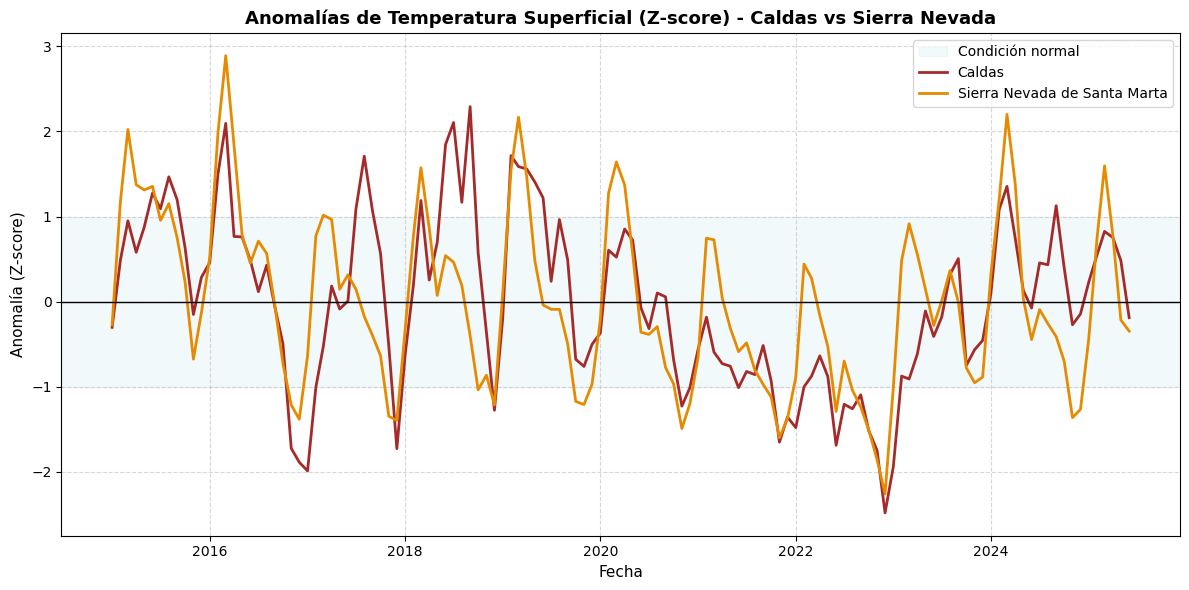

In [ ]:
# ======================================================
# ANOMALÍAS DE TEMPERATURA SUPERFICIAL DEL SUELO (TS)
# Caldas vs Sierra Nevada de Santa Marta
# ======================================================

import matplotlib.pyplot as plt

# Calculamos anomalías (Z-score)
TS_monthly_caldas['TS_anom'] = (
    TS_monthly_caldas['TS_C'] - TS_monthly_caldas['TS_C'].mean()
) / TS_monthly_caldas['TS_C'].std()

TS_monthly_sierra['TS_anom'] = (
    TS_monthly_sierra['TS_C'] - TS_monthly_sierra['TS_C'].mean()
) / TS_monthly_sierra['TS_C'].std()

# Graficamos 
plt.figure(figsize=(12,6))

# Franja sombreada para condiciones normales
plt.axhspan(-1, 1, color='#ADD8E6', alpha=0.15, label='Condición normal')

# Curvas de anomalías
plt.plot(TS_monthly_caldas['month'], TS_monthly_caldas['TS_anom'],
         label='Caldas', color='#A52A2A', linewidth=2)
plt.plot(TS_monthly_sierra['month'], TS_monthly_sierra['TS_anom'],
         label='Sierra Nevada de Santa Marta', color='#E68A00', linewidth=2)

# Línea base (anomalía cero)
plt.axhline(0, color='black', linewidth=1)

# --- 3. Estilo del gráfico ---
plt.title('Anomalías de Temperatura Superficial (Z-score) - Caldas vs Sierra Nevada',
          fontsize=13, fontweight='bold')
plt.xlabel('Fecha', fontsize=11)
plt.ylabel('Anomalía (Z-score)', fontsize=11)

plt.legend(frameon=True, loc='upper right', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
